# Homework 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
sns.set(style='ticks', palette='Set2')

## Question 1

In the course, we have outlined how to derive the Fokker–Planck equation for the distribution
of the membrane potential under excitatory input (equation (8.41) in the chapter posted on
the course website).

- Complete the missing steps in this derivation, starting from Eq. (8.37) and ending with
Eq. (8.41).

### Answer

Starting with Equation 8.37:

$$
\begin{align*} 
P^{trans}(u, t+\Delta t | u', t) = [1 - \Delta t \sum_{k} v_k(t)] \delta(u-u'e^{-\Delta t/\tau_m}) + \Delta t \sum_{k} v_k(t) \delta(u-u'e^{-\Delta t/\tau_m} - w_k)
\end{align*}
$$

And given Equation 8.38:

$$
\begin{align*} 
P(u, t + \Delta t) = \int P^{trans}(u, t+\Delta t | u', t) P(u', t) du'
\end{align*}
$$

We can insert 8.37 into 8.38 and integrate. To integrate, we must consider the following property of delta functions $\delta(au) = a^{-1}\delta(u)$:

$$
\begin{align*} 
P(u, t + \Delta t) = \int [1 - \Delta t \sum_{k} v_k(t)] \delta(\frac{1}{e^{\Delta t/\tau_m}} (u e^{\Delta t/\tau_m}-u')) P(u', t) du' + \int \Delta t \sum_{k} v_k(t) \delta(\frac{1}{e^{\Delta t/\tau_m}} (u e^{\Delta t/\tau_m}-u' -w_k) P(u', t) du'
\end{align*}
$$

We therefore obtain:

$$
\begin{align*} 
P(u, t + \Delta t) = [1 - \Delta t \sum_{k} v_k(t)] e^{\Delta t/\tau_m} P(e^{\Delta t/\tau_m} u, t) + \Delta t \sum_{k} v_k(t) e^{\Delta t/\tau_m} P(e^{\Delta t/\tau_m}u - w_k, t)
\end{align*}
$$

We then assume that $\Delta t$ is very small and expand about $\Delta t = 0$. To expand, we use the following taylor expansions: $e^{\Delta t/\tau_m} = 1 + \frac{\Delta t}{\tau_m}$ and $P(e^{\Delta t/\tau_m} u, t) = P(u, t) + \frac{\Delta t}{\tau_m} u \frac{\partial P(u, t)}{\partial u}$. We can input this into mathmatica to get the second order expansion.

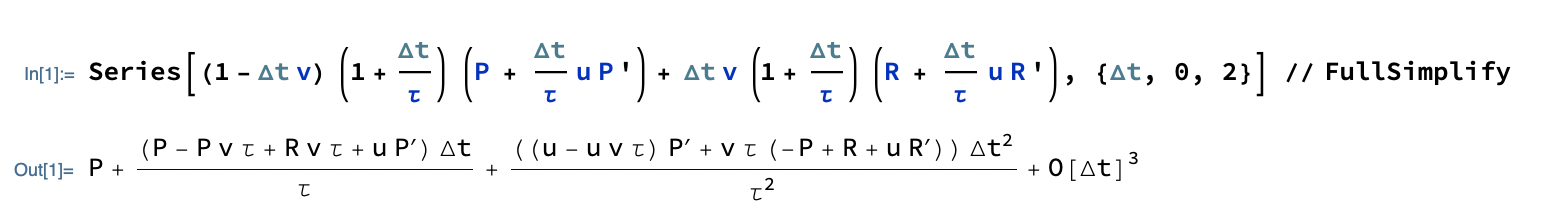

In [6]:
image = Image.open('FP_taylor_exp.png')
image

Where P is $P(u, t)$, R is $P(u - w_k, t)$, and v = $\sum_{k} v_k(t)$. We then move the first term to the left hand side and divide out $\Delta t$. We also substitute $\Delta t = 0$, since we also expanded about a small $\Delta t$:

$$
\begin{align*} 
\frac{P(u, t + \Delta t) - P(u, t)}{\Delta t} = \frac{1}{\tau_m} P(u, t) -  \sum_{k} v_k(t) P(u, t) + \sum_{k} v_k(t) P(u - w_k, t) + \frac{1}{\tau_m} u \frac{\partial P(u, t)}{\partial u}
\end{align*}
$$

Through some more rearangement we obtain: 

$$
\begin{align*} 
\frac{P(u, t + \Delta t) - P(u, t)}{\Delta t} = \frac{1}{\tau_m} P(u, t) + \frac{1}{\tau_m} u \frac{\partial P(u, t)}{\partial u} + \sum_{k} v_k(t) [P(u - w_k, t) - P(u, t)]
\end{align*}
$$

We then run some mathmatica code to expand in $w_k$:

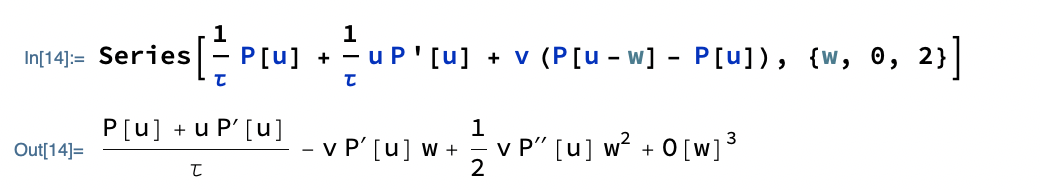

In [7]:
image = Image.open('wk_expansion.png')
image

Through some other rearrangements we get the following:

      
$$
\begin{align*} 
\tau_m \frac{\partial P(u, t)}{\partial t} = -\frac{\partial P(u, t)}{\partial u}[-u + \tau_m \sum_{k} v_k(t) w_k]P(u, t) + \frac{1}{2} [\tau_m \sum_{k} v_k(t) w_k^{2}] \frac{\partial^2 P(u, t)}{\partial u^2}
\end{align*}
$$

- Verify that Eq. (8.45) is a solution of the equation with free boundary conditions by
direct substitution.

### Answer

We then insert Equation 8.45 (with mean $RI$, variance $\sigma^{2} / \sqrt{2}$ and as $t \rightarrow \infty $) into 8.41. Note here that $RI = \tau_m \sum_{k} v_k(t) w_k$ and $\sigma^{2} = \tau_m \sum_{k} v_k(t) w_k^{2}$.

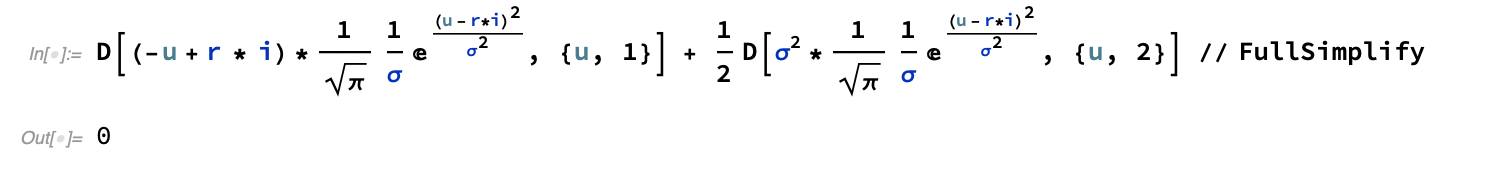

In [8]:
image = Image.open('stationary_dist.png')
image

This confirms that the solution to the Fokker-Planck equation is Equation 8.45. The output is zero since Equation 8.45 is the stationary distribution when $t \rightarrow \infty$.

- Simulate an integrate and fire neuron with Poisson input
without threshold
to verify that
after sufficient time the membrane potential follows the distribution given by Eq.(8.46).
You can do this either by running a long simulation, and sampling the potential at
different times, or by running many simulations.

In the following simulations we consider a single neuron with a synaptic weight $w_k = 1$, input rate $v_k = 40 hz$ and $\tau_m = 1$. Therefore the mean and variance for Eq 8.46 is

$$
\begin{align*} 
\mu = \tau_m \sum_k v_k w_k = 40 \\
\sigma^{2} = \frac{\tau_m \sum_k v_k w_k^{2}}{\sqrt2} = 28.28
\end{align*}
$$

We run an ensemble of 1000 simulations where we stop each replicate when a spike occurs.

### Answer

In [5]:
def LIF(tau_m, v, w, max_steps, dt):
    time = np.zeros(max_steps)
    u = np.zeros(max_steps)
    for t in range(max_steps-1):
            u[t+1] = u[t] + dt*((-u[t] + w*v*tau_m)/tau_m) + np.sqrt(tau_m*v*np.power(w, 2))*np.sqrt(dt)*np.random.normal()
            time[t+1] = time[t] + dt
    return u[-1]

In [6]:
tau_m = 1
w = 1
v = 40
max_steps = 1000
dt = 0.005

vals = [LIF(tau_m, v, w, max_steps, dt) for i in range(1000)]

In [9]:
def distribution(u, sigma, mean):
    return (1/np.sqrt(np.pi))*(1/sigma)*np.exp(-np.power(u-mean, 2)/np.power(sigma, 2))

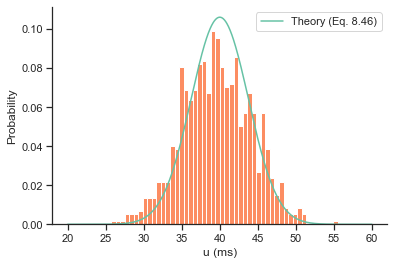

In [25]:
u = np.linspace(20, 60, 1000)
sigma = np.sqrt(1*40*np.power(1, 2)/(np.sqrt(2)))
mean = 1*40*1
plt.plot(u, distribution(u, sigma, mean), label='Theory (Eq. 8.46)')
plt.hist(vals, density=True, bins=50)
plt.xlabel('u (ms)')
plt.ylabel('Probability')
plt.legend()
sns.despine()

## Question 2

Use the derivation in Lecture 16, and the notes from the book by Gardiner to compute the
expected time for a leaky integrate and fire neuron to fire. Assume a threshold $\theta$, resting potential set to 0, and $\tau_m = 1$. Assume that the input $RI_0$ is constant, and that the variance $\sigma^{2}(t) = \sigma^{2}$ is constant as well.

Simulate an integrate and fire neuron with threshold to show that this expected time is a good approximation. In particular, you will need to choose a synaptic weight $w_k = w$ (all equal), and input rate $v_k(t) = v_k$ (all equal and constant) to define the parameters $RI_0$ and $\sigma^{2}$. Note that you can use the code from the challenges for this simulation.

In the following simulations we consider a single neuron with a synaptic weight $w_k = 1$, input rate $v_k = 40 hz$ and $\tau_m = 1$. Therefore 

$$
\begin{align*} 
A(x) = \tau_m \sum_k v_k w_k = 40 \\
B(x) = \tau_m \sum_k v_k w_k^{2} = 40
\end{align*}
$$

We run an ensemble of 1000 simulations where we stop each replicate when a spike occurs.

In [30]:
def LIF(tau_m, v, w, max_steps, dt, u_threshold):
    time = np.zeros(max_steps)
    u = np.zeros(max_steps)
    for t in range(max_steps-1):
        if u[t] > u_threshold:
            u[t+1] = 0
            time[t+1] = time[t] + dt
            return time[t+1]
        else:
            u[t+1] = u[t] + dt*((-u[t] + w*v*tau_m)/tau_m) + np.sqrt(tau_m*v*np.power(w, 2))*np.sqrt(dt)*np.random.normal()
            time[t+1] = time[t] + dt

In [31]:
tau_m = 1
w = 1
v = 40
max_steps = 10000
dt = 0.01
u_threshold = 40

In [32]:
waiting_times = [LIF(tau_m, v, w, max_steps, dt, u_threshold) for i in range(1000)]

In [33]:
print("Mean Waiting Time: ", np.mean(waiting_times), "ms")

Mean Waiting Time:  2.8743799999999813 ms


Checking the expectation using mathmatica (where $A(x), B(x) = 40 hz * dt, dt = 0.01$), we get:

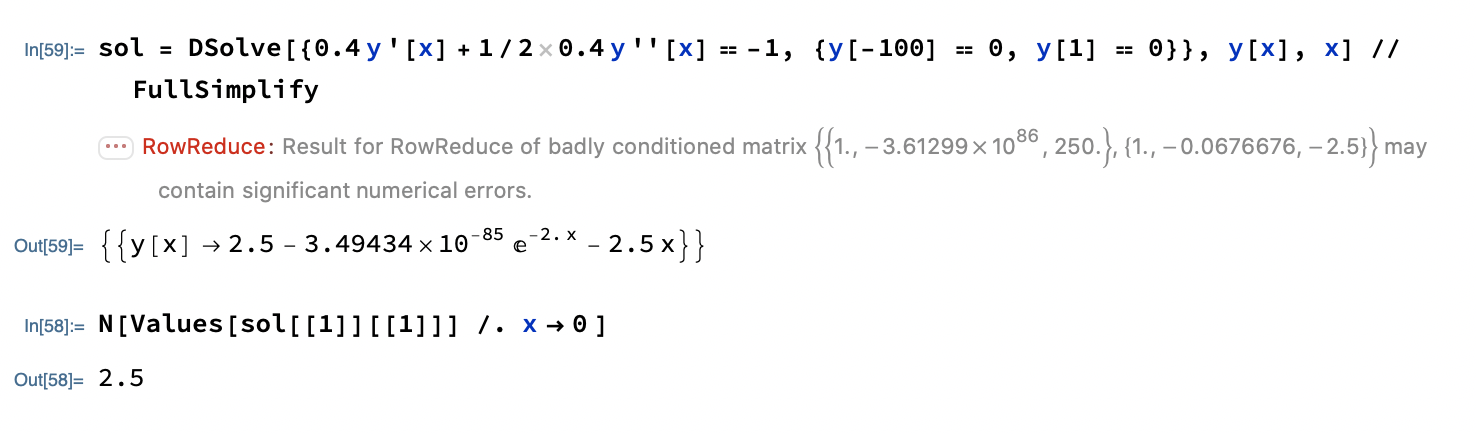

In [166]:
image = Image.open('waiting_time_neuron.png')
image

## Question 3

Suppose that the times between spikes are distributed according to a gamma distribution, $\Gamma(\alpha, \beta)$.

- Compute the coefficient of variation of the inter-spike interval.

### Answer

Given the expected value and variance of the Gamma distribution, we can also obtain the standard deviation:

$$
\begin{align*} 
E[x] &= \frac{\alpha}{\beta} \\
Var[x] &= \frac{\alpha}{\beta} \\
Std[x] &= \frac{\sqrt{\alpha}}{\beta}
\end{align*}
$$

Using these definitions, we then insert them into the formula for the coefficient of variation:

$$
\begin{align*} 
CV &= \frac{Std[x]}{E[x]} \\
CV &= \frac{\frac{\sqrt{\alpha}}{\beta}}{\frac{\alpha}{\beta}} \\
CV &= \frac{\frac{\sqrt{\alpha}}{\beta}\frac{\beta}{\alpha}}{\frac{\alpha}{\beta}\frac{\beta}{\alpha}} \\
CV &= \frac{\sqrt{\alpha}}{\alpha} \\
CV &= \frac{1}{\sqrt{\alpha}}
\end{align*}
$$

- A special case of the gamma distribution is the Erlang distribution. This is the distribution of the sum of
$k$ iid exponentially distributed random variables with parameter $\lambda$. Find the coefficient of variation for an inter-event time that follows the Erlang distribution with fixed $\lambda$ and increasing $k$. Interpret your results.

We follow a similar process to the Gamma distribution case. We first define the mean, variance, and standard deviation of the Erlang distribution:


$$
\begin{align*} 
E[x] &= \frac{k}{\lambda} \\
Var[x] &= \frac{k}{\lambda^{2}} \\
Std[x] &= \frac{\sqrt{k}}{\lambda}
\end{align*}
$$

Using these definitions, we then insert them into the formula for the coefficient of variation:

$$
\begin{align*} 
CV &= \frac{Std[x]}{E[x]} \\
CV &= \frac{\frac{\sqrt{k}}{\lambda}}{\frac{k}{\lambda}} \\
CV &= \frac{\frac{\sqrt{k}}{\lambda}\frac{\lambda}{k}}{\frac{k}{\lambda}\frac{\lambda}{k}} \\
CV &= \frac{\sqrt{k}}{k} \\
CV &= \frac{1}{\sqrt{k}}
\end{align*}
$$

We can clearly see that as the number of k events increases (spikes), the CV decreases. This makes sense because our estimate of the inter-event times should be more precise as the number of spikes increases. 

## Question 4

Two Moran process with two alleles, $a$ and $A$, with mutation but without selection has transition rates

$$
\begin{align*} 
T(n+1|n) &= (1-u)(\frac{n}{N})(1 - \frac{n}{N}) + v(1 - \frac{n}{N})^{2} \\
T(n-1|n) &= (1-v)(1 - \frac{n}{N})(\frac{n}{N}) + u(\frac{n}{N})^{2}
\end{align*}
$$

where $P(n, t)$ is the probability that there are $n$ copies of allele $a$ at time $t$, $u$ is the rate of
mutation from $a$ to $A$ and $v$ the rate of mutation from $A$ to $a$. The master equation for this
process is

$$
\begin{align*} 
\frac{dP(n, t)}{dt} &= -P(n, t)(T(n+1|n)+T(n-1|n)) + P(n+1, t)T(n|n+1) + P(n-1, t)T(n|n-1)
\end{align*}
$$

Setting $x = n/N$, Taylor expand the master equation retaining only terms up to order $1/N^{2}$ to derive the Fokker Planck equation for this system.

### Answer

We first consider the following transition probabilities. We consider the large $N$ limit and substitute $x = \frac{n}{N}$:


$$
\begin{align*} 
T(x+\frac{1}{N}|n) &= (1-u)(x)(1 - x) + v(1 - x)^{2} \\
T(x-\frac{1}{N}|n) &= (1-v)(1 - x)(x) + u(x)^{2} \\
T(x|x+\frac{1}{N}) &= (1-v)(x + \frac{1}{N})(1 - x - \frac{1}{N}) + u(x + \frac{1}{N})^{2} \\
T(x|x-\frac{1}{N}) &= (1-u)(1 - x + \frac{1}{N})(x - \frac{1}{N}) + v(1 - x + \frac{1}{N})^{2} 
\end{align*}
$$

Expanding on $\frac{1}{N}$ for the probability distribution and ignoring all terms $\frac{1}{N^{3}}$:


$$
\begin{align*} 
P(x+\frac{1}{N}, t) &= P(x, t) + \frac{1}{N} \frac{\partial P}{\partial x} + \frac{1}{2N^{2}} \frac{\partial^{2} P}{\partial x^{2}}\\
P(x-\frac{1}{N}, t) &= P(x, t) - \frac{1}{N} \frac{\partial P}{\partial x} + \frac{1}{2N^{2}} \frac{\partial^{2} P}{\partial x^{2}}\\
\end{align*}
$$

We then can insert the transition probabilities and expansions into the master equation:

$$
\begin{align*} 
\frac{dP(n, t)}{dt} = -P(x, t)((1-u)(x)(1 - x) + v(1 - x)^{2} + (1-v)(1 - x)(x) + u(x)^{2}) + (P(x, t) + \frac{1}{N} \frac{\partial P}{\partial x} + \frac{1}{2N^{2}} \frac{\partial^{2} P}{\partial x^{2}})((1-v)(x + \frac{1}{N})(1 - x - \frac{1}{N}) + u(x + \frac{1}{N})^{2}) + (P(x, t) - \frac{1}{N} \frac{\partial P}{\partial x} + \frac{1}{2N^{2}} \frac{\partial^{2} P}{\partial x^{2}})((1-u)(1 - x + \frac{1}{N})(x - \frac{1}{N}) + v(1 - x + \frac{1}{N})^{2})
\end{align*}
$$

With some simplification, we obtain:

$$
\begin{align*} 
\frac{dP(n, t)}{dt} = \frac{-2 + \mu (2 + N) + v(2 + N)}{N^{2}} P(x, t) + \frac{2 - \mu - v(3 + N) - 4x + (\mu + v)(4 + N)x}{N^{2}}\frac{\partial P}{\partial x} + \frac{-2 + 2 \mu + 2v + \mu N + vN+ vN^{2} - (-2 + \mu + 3v)N^{2}x + 2(-1 + \mu + v)N^{2}x^{2}}{2N^{4}}\frac{\partial^{2} P}{\partial x^{2}}
\end{align*}
$$


We then rescale with $t = \frac{\tau}{N^{2}}$:

$$
\begin{align*} 
\frac{dP(n, \tau)}{d\tau} = (-2 + \mu (2 + N) + v(2 + N)) P(x, \tau) + (2 - \mu - v(3 + N) - 4x + (\mu + v)(4 + N)x)\frac{\partial P}{\partial x} + \frac{-2 + 2 \mu + 2v + \mu N + vN+ vN^{2} - (-2 + \mu + 3v)N^{2}x + 2(-1 + \mu + v)N^{2}x^{2}}{2N^{2}}\frac{\partial^{2} P}{\partial x^{2}}
\end{align*}
$$

If we rescale mutation rates as $\mu = \mu N$ and $v = v N$, as well as considering the large $N$ limit:


$$
\begin{align*} 
\frac{dP(n, \tau)}{d\tau} = (\mu + v) P(x, \tau) , \tau + (-v + (\mu + v)x) \frac{\partial P}{\partial x} + (-2x-2x^{2})\frac{\partial^{2} P}{\partial x^{2}}
\end{align*}
$$

## Question 5

In this question you will estimate the hitting time via simulation for the two-step adaptation
process (Lecture 17). tialize the population such that all individuals have genotype 1.
Assume that genotype 1 mutates to genotype 2 at rate $\mu_{12}$ and genotype 2 mutates to
genotype 3 at rate $\mu_{23}$. By simulating a haploid Moran process, estimate the expected
time for the population to produce an individual with genotype 3, for mutation rates (i) $\mu_{12}$ = $\mu_{23}$ = 0.1/$N$, (ii) $\mu_{12}$ = $\mu_{23}$ = 1/$N$,and (iii) $\mu_{12}$ = $\mu_{23}$ = 10/$N$, using $N$ = 1000 in all
cases. How do the results compare to the naive expectation that the waiting time should be ~ $1/\mu$ (which as we saw in class is the weak mutation limit which holds when $\mu << 1/N^{2}$)?

### Answer

In [149]:
def two_step_adaptation(num_1, num_2, num_3, mu_12, mu_23, max_population, max_time):
    current_time = 0
    while current_time < max_time:
        mutate_12 = mu_12*num_1
        mutate_23 = mu_23*num_2
        cum_sum_rates = np.cumsum([mutate_12,  mutate_23])
        current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
        rand_prob = np.random.rand() * cum_sum_rates[-1]
        
        if rand_prob < cum_sum_rates[0]:
            num_1 -= 1
            num_2 += 1
        else:
            num_2 -= 1
            num_3 += 1
            return current_time

In [150]:
num_1 = 1000
num_2 = 0
num_3 = 0
max_population = 1000
mu = [0.1/max_population, 1/max_population, 10/max_population]
max_time = 1000000000000

In [151]:
mean_times = []
num_sims = 10000

for mut in mu:
    waiting_times = [two_step_adaptation(num_1, num_2, num_3, mut, mut, max_population, max_time) for i in range(num_sims)]
    waiting_times = np.asarray(waiting_times)
    mean_times.append(np.mean(waiting_times))

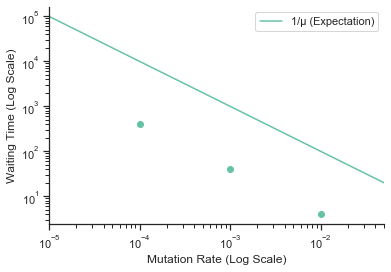

In [152]:
m = np.linspace(1e-5, 0.05, 1000)

plt.scatter(mu, mean_times)
plt.plot(m, 1/m, label='1/\u03BC (Expectation)')
plt.xlim(1e-5, 0.05)
plt.yscale('log')
plt.ylabel('Waiting Time (Log Scale)')
plt.xscale('log')
plt.xlabel('Mutation Rate (Log Scale)')
plt.legend()
sns.despine()

The results of the simulations (ensemble of 1000 replicates) are about two magnitudes lower than the expectation. This clearly shows what can occur when the weak mutation limit assumption ($\mu << 1/N^{2}$) breaks down.